## Make Input File Database
#### Landon Buell - May 2023

In [1]:
import os
import numpy as np
import pandas as pd

DATASET_HEAD = os.path.abspath(os.path.join("..","dataset","asl_alphabet_train"))
ACCEPTED_FORMATS = ["png","jpg","jpeg"]
MAX_RECURSE_DEPTH = 8

DATASET_HEAD

'C:\\Users\\lando\\Documents\\GitHub\\Buell-Masters-Project\\dataset\\asl_alphabet_train'

In [2]:
class LabeledSample:
    """ Structure to store a path to an image and a """
    
    def __init__(self,pathToFile,label):
        """ Constructor """
        self.path = pathToFile
        self.classStr = label
        self.classInt = 0
        
    def __str__(self) -> str:
        """ Return a string representation of the instance """
        return "{0}/{1} <- {2}".format(self.classStr,self.classInt,self.path)


In [3]:
# Function to Add a Sample to the running list

def addSampleToList(fullPathToSample,listOfSamples):
    """ Add a Labeled Sample instan,ce to the list of samples """
    head,tail = os.path.split(fullPathToSample)
    headTokens = head.split(os.path.sep)
    folderName = headTokens[-1] # In this dataset, the folder is the target label
    newSample = LabeledSample(fullPathToSample,folderName)
    listOfSamples = np.append(listOfSamples,newSample)
    return listOfSamples
    

In [4]:
# Recurve through the DATASET_HEAD path to find samples

def traverse(pathToSearch,currentDepth,listOfSamples):
    """ Recursively traverse a directory tree """
    pathContents = os.listdir(pathToSearch)
    for item in pathContents:
        fullPathToItem = os.path.join(pathToSearch,item)
        
        if (os.path.isdir(fullPathToItem) == True):
            # Item is a directory
            if (currentDepth >= MAX_RECURSE_DEPTH):
                continue
            listOfSamples = traverse(fullPathToItem,currentDepth + 1,listOfSamples)
        elif (os.path.isfile(fullPathToItem) == True):
            # Item is a file
            extension = item.split(".")[-1]
            if (extension not in ACCEPTED_FORMATS):
                continue
            listOfSamples = addSampleToList(fullPathToItem,listOfSamples)
        else:
            # Not a file or folder
            continue
    return listOfSamples
            

In [5]:
# Recurse from the head
listOfLabeledSamples = np.array([],dtype=object)

listOfLabeledSamples = traverse(DATASET_HEAD,0,listOfLabeledSamples)

In [6]:
len(listOfLabeledSamples)

87000

In [7]:
np.unique([x.classStr for x in listOfLabeledSamples])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'del', 'nothing', 'space'], dtype='<U7')

In [8]:
str(listOfLabeledSamples[0])

'A/0 <- C:\\Users\\lando\\Documents\\GitHub\\Buell-Masters-Project\\dataset\\asl_alphabet_train\\asl_alphabet_train\\A\\A1.jpg'

In [9]:
import string
LETTERS_UPPER = list(string.ascii_uppercase)
LETTERS_UPPER

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [10]:
STR_TO_INT_MAP = dict()
for ii,letter in enumerate(LETTERS_UPPER):
    STR_TO_INT_MAP.update({letter:ii})
STR_TO_INT_MAP.update({"space":len(STR_TO_INT_MAP) + 0})
STR_TO_INT_MAP.update({"del":len(STR_TO_INT_MAP) + 0})
STR_TO_INT_MAP.update({"nothing":len(STR_TO_INT_MAP) + 0})

In [11]:
for (key,val) in STR_TO_INT_MAP.items():
    line = "{0:<8} -> {1}".format(key,val)
    print(line)

A        -> 0
B        -> 1
C        -> 2
D        -> 3
E        -> 4
F        -> 5
G        -> 6
H        -> 7
I        -> 8
J        -> 9
K        -> 10
L        -> 11
M        -> 12
N        -> 13
O        -> 14
P        -> 15
Q        -> 16
R        -> 17
S        -> 18
T        -> 19
U        -> 20
V        -> 21
W        -> 22
X        -> 23
Y        -> 24
Z        -> 25
space    -> 26
del      -> 27
nothing  -> 28


In [12]:
for item in listOfLabeledSamples:
    classInt = STR_TO_INT_MAP[item.classStr]
    item.classInt = classInt

In [13]:
listOfLabeledSamples[0].__str__()

'A/0 <- C:\\Users\\lando\\Documents\\GitHub\\Buell-Masters-Project\\dataset\\asl_alphabet_train\\asl_alphabet_train\\A\\A1.jpg'

In [14]:
frame = pd.DataFrame(data=None,index=None)
frame["filePath"] = [x.path for x in listOfLabeledSamples]
frame["classInt"] = [x.classInt for x in listOfLabeledSamples]
frame["classStr"] = [x.classStr for x in listOfLabeledSamples]

In [15]:
frame.head(10)

,filePath,classInt,classStr
0,C:\Users\lando\Documents\GitHub\Buell-Masters-...,0,A
1,C:\Users\lando\Documents\GitHub\Buell-Masters-...,0,A
2,C:\Users\lando\Documents\GitHub\Buell-Masters-...,0,A
3,C:\Users\lando\Documents\GitHub\Buell-Masters-...,0,A
4,C:\Users\lando\Documents\GitHub\Buell-Masters-...,0,A
5,C:\Users\lando\Documents\GitHub\Buell-Masters-...,0,A
6,C:\Users\lando\Documents\GitHub\Buell-Masters-...,0,A
7,C:\Users\lando\Documents\GitHub\Buell-Masters-...,0,A
8,C:\Users\lando\Documents\GitHub\Buell-Masters-...,0,A
9,C:\Users\lando\Documents\GitHub\Buell-Masters-...,0,A


In [20]:
frame.shape

(87000, 3)

array([[<AxesSubplot:title={'center':'classInt'}>]], dtype=object)

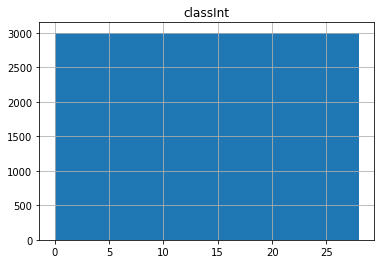

In [18]:
frame.hist(column="classInt",grid=True,bins=29)

In [19]:
exportPath = os.path.abspath(os.path.join("..","inputFiles","labeledSamples.csv"))
exportPath

'C:\\Users\\lando\\Documents\\GitHub\\Buell-Masters-Project\\inputFiles\\labeledSamples.csv'

In [23]:
frame.to_csv(exportPath,index=None)

In [20]:
frameCondensed = frame.iloc[::10]

In [21]:
frameCondensed.shape

(8700, 3)

array([[<AxesSubplot:title={'center':'classInt'}>]], dtype=object)

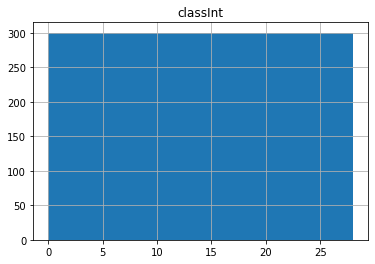

In [22]:
frameCondensed.hist(column="classInt",grid=True,bins=29)